In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.layers import Attention
from tensorflow.keras.layers import Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM
warnings.filterwarnings("ignore")

In [ ]:
# Initialize yfinance
def initialize_yfinance():
    yf.pdr_override()

# Function to set up and return a list of tech stocks
def get_tech_stock_list():
    company_names = ["MICROSOFT", "AMAZON","APPLE", "GOOGLE"]
    stock_symbol_list = ['MSFT', 'AMZN','AAPL', 'GOOG']

    return company_names,stock_symbol_list

# Download stock data for a list of symbols within a specified date range
def download_stock_data(symbols, start_date, end_date):
    data = {}
    for symbol in symbols:
        data[symbol] = yf.download(symbol, start=start_date, end=end_date)
    return data

def fetch_stock_data(stock_symbol, start_date, end_date):
    # Get the stock quote
    df = yf.download(stock_symbol, start=start_date, end=end_date)
    return df


# Combine data for multiple companies into one DataFrame
def combine_data(data, company_names):
    company_list = []
    for symbol, company_name in zip(data.values(), company_names):
        symbol["company_name"] = company_name
        company_list.append(symbol)
    return pd.concat(company_list, axis=0)

def plot_stock_price(combined_data, company_names,stock_symbols):
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(top=1.25, bottom=1.2)
    for i in range(1,len(company_names)+1):
        plt.subplot(2, 2, i)
        combined_data[combined_data['company_name']==company_names[i-1]]['Adj Close'].plot()
        plt.ylabel('Adj Close')
        plt.xlabel(None)
        plt.title(f"Closing Price of {stock_symbols[i - 1]}")
        plt.tight_layout()


def plot_volume_of_sales(stock_data, company_names,stock_symbols):
    plt.figure(figsize=(15, 10))
    plt.subplots_adjust(top=1.25, bottom=1.2)
    for i in range(1,len(company_names)+1):
        plt.subplot(2, 2, i)
        combined_data[combined_data['company_name']==company_names[i-1]]['Volume'].plot()
        plt.ylabel('Volume')
        plt.xlabel(None)
        plt.title(f"Sales Volume for {stock_symbols[i - 1]}")

    plt.tight_layout()

def plot_expected_returns(combined_data,company_names,stock_symbol_list):
  closing_df = pdr.get_data_yahoo(stock_symbol_list,  start=datetime.strptime(start_date, "%Y-%m-%d"), end=datetime.strptime(end_date, "%Y-%m-%d"))['Adj Close']
  stock_returns = closing_df.pct_change()
  stock_returns = stock_returns.dropna()
  area = np.pi * 20
  plt.figure(figsize=(10, 8))
  plt.scatter(stock_returns.mean(), stock_returns.std(), s=area)
  plt.xlabel('Expected return')
  plt.ylabel('Risk')

  for label, x, y in zip(stock_returns.columns, stock_returns.mean(), stock_returns.std()):
      plt.annotate(f"{label}\n({x:.6f}, {y:.6f})", xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                  arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

  plt.show()

def plot_daily_returns(combined_data, company_names,stock_symbols):
    for company in company_names:
      print(company)
      combined_data.loc[combined_data['company_name'] == company, 'Daily Return'] = combined_data.loc[combined_data['company_name'] == company, 'Adj Close'].pct_change()
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    combined_data[combined_data['company_name']==company_names[0]]['Daily Return'].plot(ax=axes[0,0], legend=True,linewidth = 1.35, marker='o')
    axes[1,0].set_title('MICROSOFT')

    combined_data[combined_data['company_name']==company_names[1]]['Daily Return'].plot(ax=axes[0,1], legend=True,linewidth = 1.35, marker='o')
    axes[1,1].set_title('AMAZON')

    combined_data[combined_data['company_name']==company_names[2]]['Daily Return'].plot(ax=axes[1,0], legend=True,linewidth = 1.35, marker='o')
    axes[0,1].set_title('APPLE')

    combined_data[combined_data['company_name']==company_names[3]]['Daily Return'].plot(ax=axes[1,1], legend=True,linewidth = 1.35, marker='o')
    axes[0,0].set_title('GOOGLE')

    fig.tight_layout()


def plot_histogram(stock_data, company_names,stock_symbols):
    plt.figure(figsize=(12, 9))
    for i in range(1,len(company_names)+1):
        plt.subplot(2, 2, i)
        combined_data[combined_data['company_name']==company_names[i-1]]['Daily Return'].hist(bins=50)
        plt.xlabel('Daily Return')
        plt.ylabel('Counts')
        plt.title(f'{company_names[i - 1]}')

    plt.tight_layout()

def plot_correlation(stock_data, company_names,stock_symbols):

    closing_df = pdr.get_data_yahoo(stock_symbols,  start=datetime.strptime(start_date, "%Y-%m-%d"), end=datetime.strptime(end_date, "%Y-%m-%d"))['Adj Close']

    stock_returns = closing_df.pct_change()
    # sns.pairplot(stock_returns, kind='reg')
    # plt.show()

def plot_correlation_coeff(stock_data,company_names,stock_symbols):
    closing_df = pdr.get_data_yahoo(stock_symbols,  start=datetime.strptime(start_date, "%Y-%m-%d"), end=datetime.strptime(end_date, "%Y-%m-%d"))['Adj Close']

    stock_returns = closing_df.pct_change()
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    sns.heatmap(stock_returns.corr(), annot=True, cmap='summer')
    plt.title('Correlation of stock return')
    plt.subplot(2, 2, 2)
    sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
    plt.title('Correlation of stock closing price')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5697 entries, 2001-01-02 to 2023-08-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5697 non-null   float64
 1   High          5697 non-null   float64
 2   Low           5697 non-null   float64
 3   Close         5697 non-null   float64
 4   Adj Close     5697 non-null   float64
 5   Volume        5697 non-null   int64  
 6   company_name  5697 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 356.1+ KB


'Summary Statistics for MICROSOFT:\nNone\n'

Summary Statistics for MICROSOFT:
              Open         High          Low        Close    Adj Close  \
count  5697.000000  5697.000000  5697.000000  5697.000000  5697.000000   
mean     76.653726    77.446966    75.850070    76.675977    70.080552   
std      84.677330    85.563824    83.752664    84.696987    86.022081   
min      15.200000    15.620000    14.870000    15.150000    11.327569   
25%      26.920000    27.195000    26.700001    26.940001    18.984095   
50%      31.500000    31.930000    31.180000    31.580000    23.684370   
75%      86.050003    86.300003    85.220001    85.709999    80.167381   
max     361.750000   366.779999   352.440002   359.489990   358.730469   

             Volume  
count  5.697000e+03  
mean   5.037572e+07  
std    2.974337e+07  
min    7.425600e+06  
25%    2.841740e+07  
50%    4.521880e+07  
75%    6.402450e+07  
max    5.910522e+08  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5697 entries, 2001-01-02 to 2023-08-24
Data col

'Summary Statistics for AMAZON:\nNone\n'

Summary Statistics for AMAZON:
              Open         High          Low        Close    Adj Close  \
count  5697.000000  5697.000000  5697.000000  5697.000000  5697.000000   
mean     37.937780    38.386618    37.447547    37.924568    37.924568   
std      51.034796    51.638861    50.364592    50.996936    50.996936   
min       0.295500     0.305000     0.275500     0.298500     0.298500   
25%       2.326000     2.380000     2.294500     2.348500     2.348500   
50%      11.025500    11.188000    10.883000    11.028500    11.028500   
75%      59.450001    59.648499    58.957001    59.368999    59.368999   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

             Volume  
count  5.697000e+03  
mean   1.204609e+08  
std    9.689653e+07  
min    1.762600e+07  
25%    6.565520e+07  
50%    9.868000e+07  
75%    1.447600e+08  
max    2.086584e+09  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5697 entries, 2001-01-02 to 2023-08-24
Data column

'Summary Statistics for APPLE:\nNone\n'

Summary Statistics for APPLE:
              Open         High          Low        Close    Adj Close  \
count  5697.000000  5697.000000  5697.000000  5697.000000  5697.000000   
mean     35.119465    35.508905    34.742998    35.140823    33.807661   
std      48.661934    49.226909    48.134764    48.702620    48.525409   
min       0.231964     0.235536     0.227143     0.234286     0.198861   
25%       2.661786     2.691786     2.632857     2.665357     2.262346   
50%      15.642857    15.846429    15.475714    15.674643    13.527636   
75%      41.200001    41.730000    40.720001    41.084999    39.202961   
max     196.240005   198.229996   195.279999   196.449997   196.185074   

             Volume  
count  5.697000e+03  
mean   4.015120e+08  
std    3.782137e+08  
min    3.145820e+07  
25%    1.297004e+08  
50%    2.792244e+08  
75%    5.423264e+08  
max    3.372970e+09  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4787 entries, 2004-08-19 to 2023-08-24
Data columns

'Summary Statistics for GOOGLE:\nNone\n'

Summary Statistics for GOOGLE:
              Open         High          Low        Close    Adj Close  \
count  4787.000000  4787.000000  4787.000000  4787.000000  4787.000000   
mean     40.093349    40.519853    39.683576    40.108056    40.108056   
std      37.148459    37.579401    36.759480    37.170933    37.170933   
min       2.470490     2.534002     2.390042     2.490913     2.490913   
25%      12.757183    12.892301    12.642986    12.772501    12.772501   
50%      26.309767    26.500172    26.054466    26.318243    26.318243   
75%      56.250750    56.791000    55.638750    56.153000    56.153000   
max     151.863495   152.100006   149.887497   150.709000   150.709000   

             Volume  
count  4.787000e+03  
mean   1.203665e+08  
std    1.518837e+08  
min    1.584340e+05  
25%    2.906500e+07  
50%    6.415557e+07  
75%    1.483560e+08  
max    1.650833e+09  



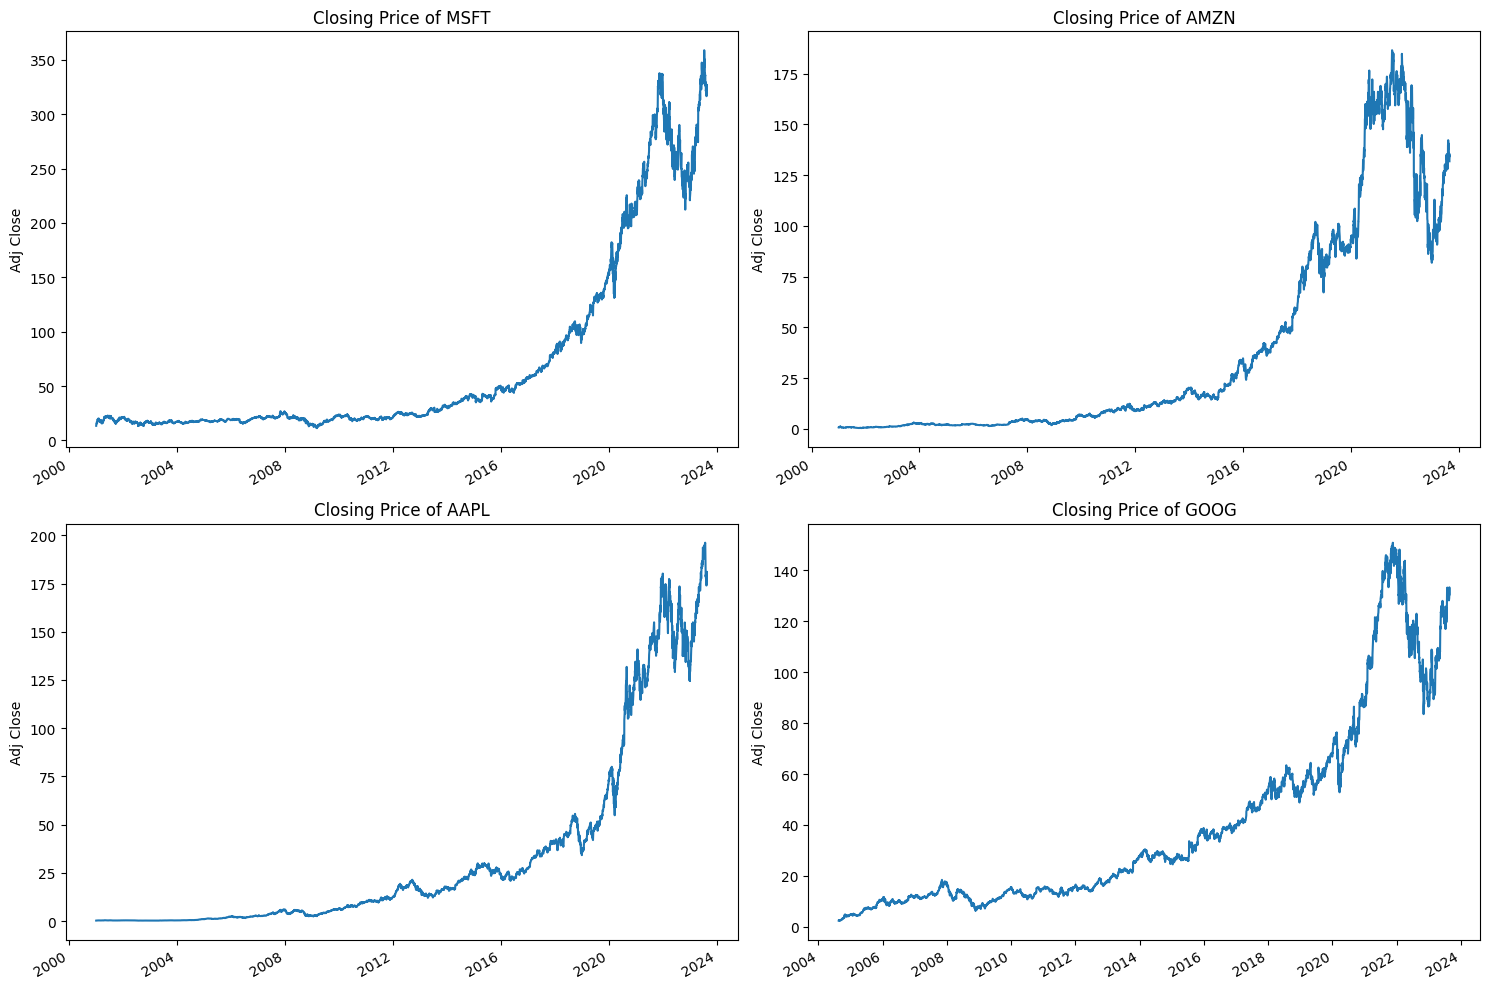

In [ ]:
start_date = '2001-01-01'
end_date = '2023-8-25'

initialize_yfinance()
company_names,stock_symbol_list = get_tech_stock_list()

# Download stock data
stock_data = download_stock_data(stock_symbol_list, start_date, end_date)

# Combine data for multiple companies
combined_data = combine_data(stock_data, company_names)

for i in range(0,4):
    ## Summary statistics
    display(f"Summary Statistics for {company_names[i]}:\n{combined_data[combined_data['company_name']==company_names[i]].info()}\n")
    print(f"Summary Statistics for {company_names[i]}:\n{combined_data[combined_data['company_name']==company_names[i]].describe()}\n")


plot_stock_price(combined_data, company_names,stock_symbol_list)


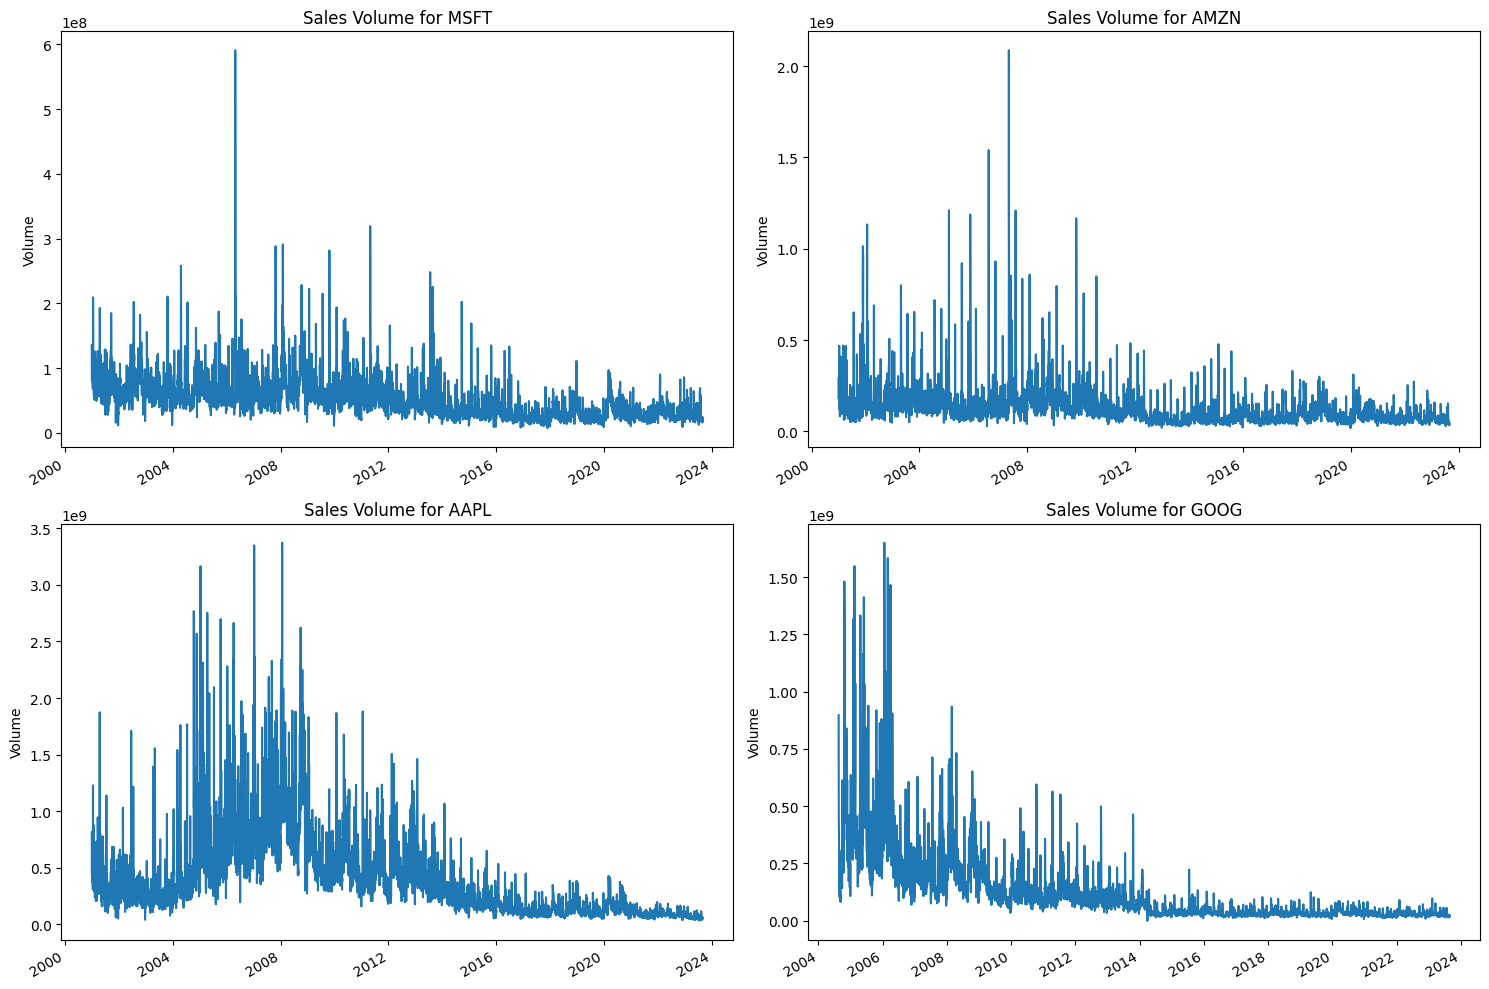

In [ ]:
plot_volume_of_sales(combined_data, company_names,stock_symbol_list)


MICROSOFT
AMAZON
APPLE
GOOGLE


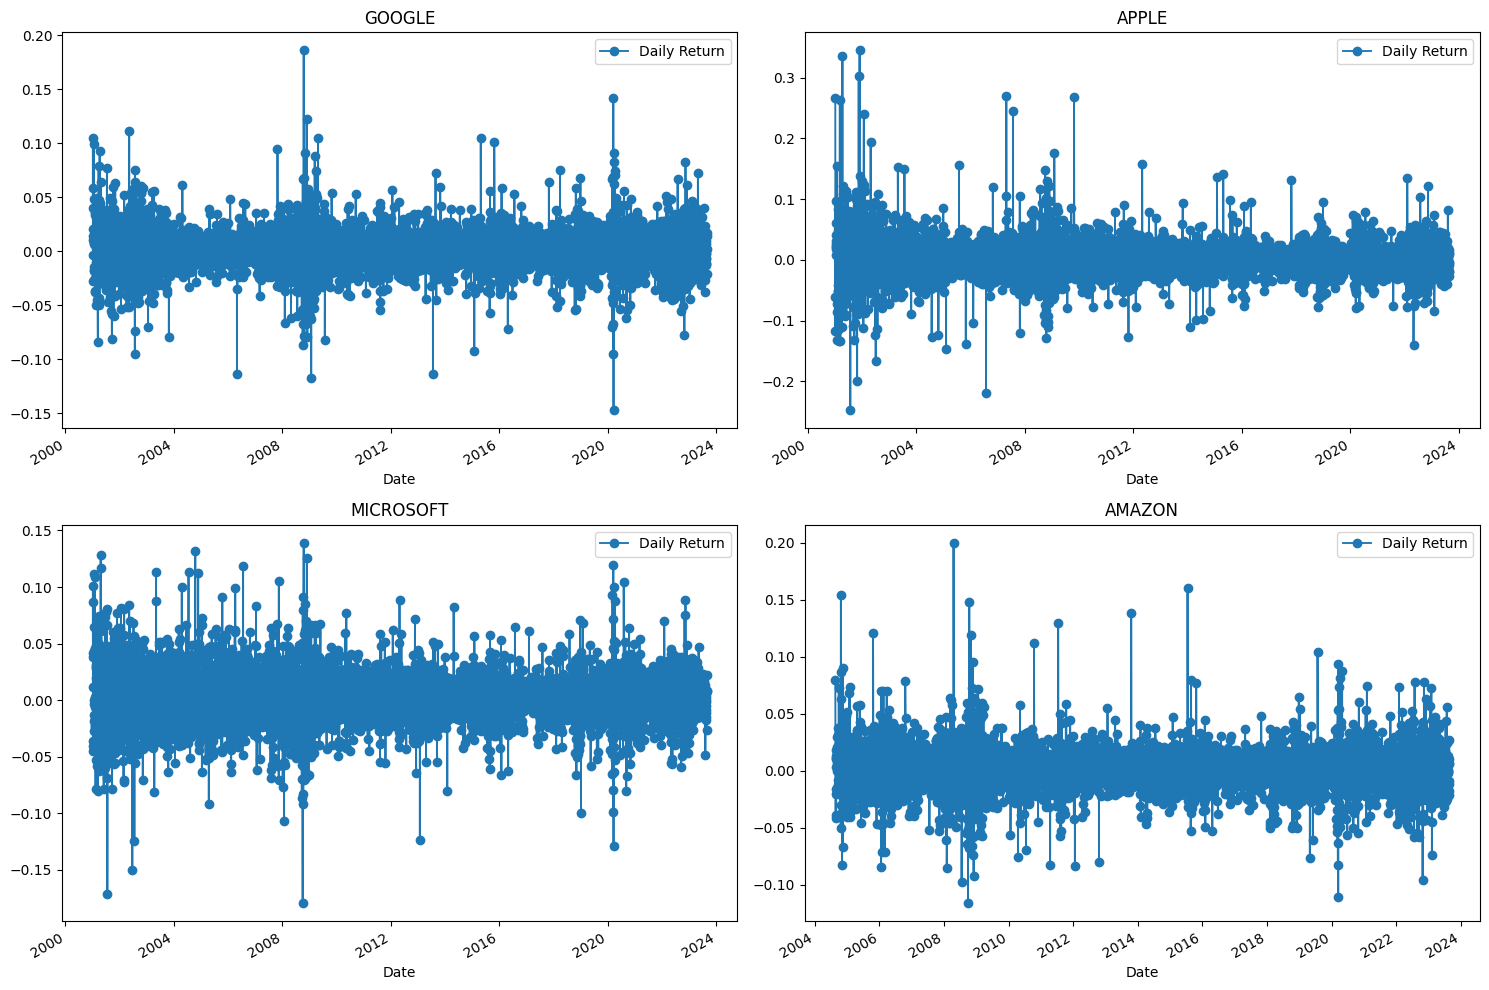

In [ ]:
plot_daily_returns(combined_data, company_names,stock_symbol_list)


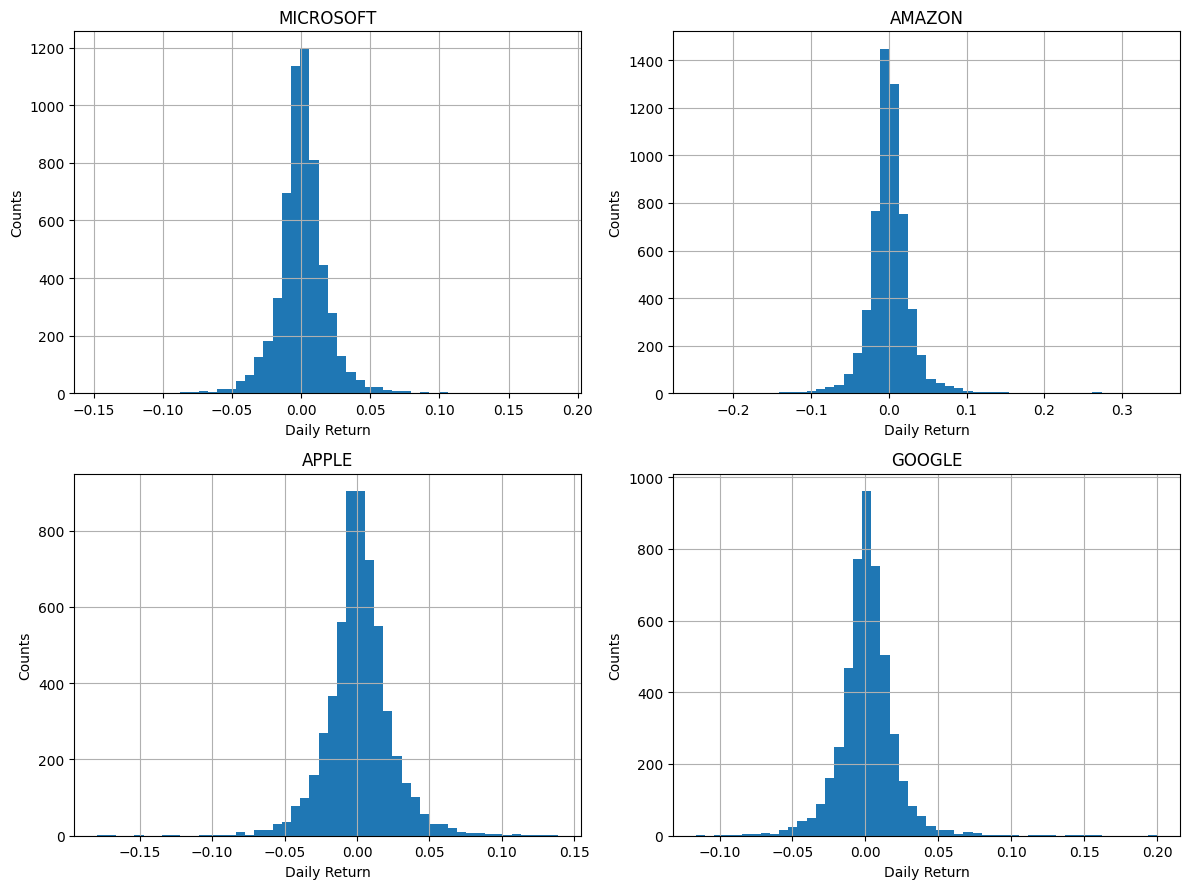

In [ ]:
plot_histogram(combined_data, company_names,stock_symbol_list)


[*********************100%%**********************]  4 of 4 completed


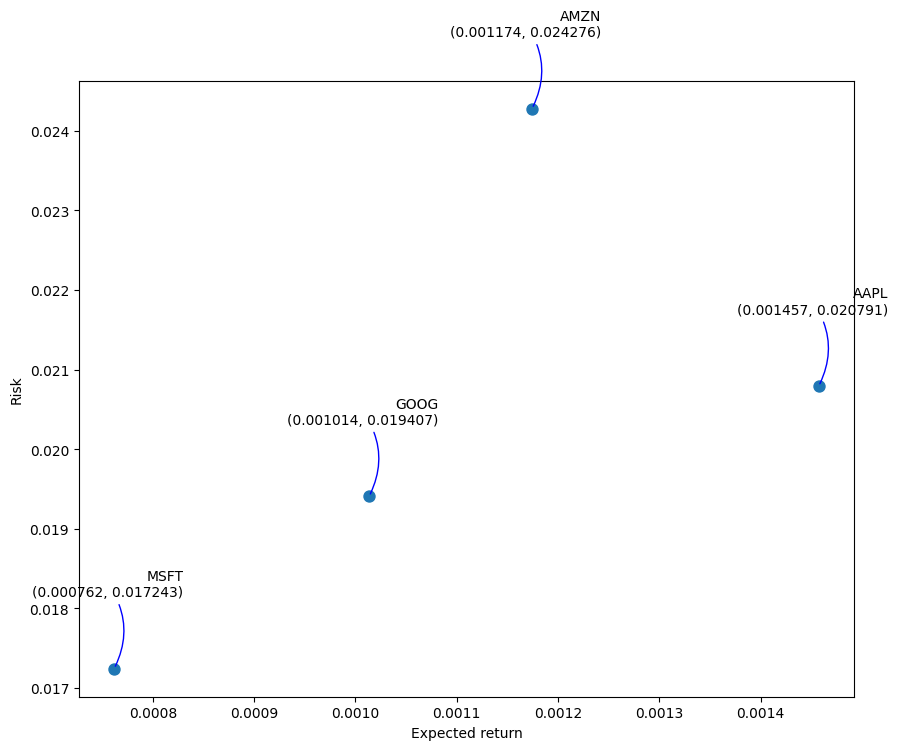

In [ ]:
plot_expected_returns(combined_data,company_names,stock_symbol_list)

[*********************100%%**********************]  4 of 4 completed


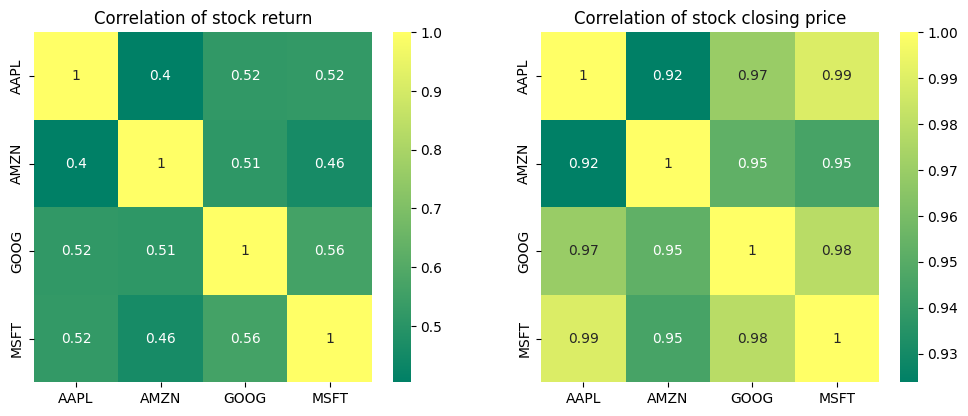

In [ ]:
plot_correlation_coeff(combined_data,company_names,stock_symbol_list)

**Model training**

In [ ]:
def plot_close_price_history(df):
    plt.figure(figsize=(16, 6))
    plt.title('Close Price History')
    plt.plot(df['Close'])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.show()

def scale_data(dataset):
    # Create a Min-Max scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    return scaler, scaled_data

def create_training_data(scaled_data):
    train_data = scaled_data[0:int(len(scaled_data) * 0.90), :]
    x_train, y_train = [], []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i - 60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    return x_train, y_train
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def train_lstm_model(model, x_train, y_train,x_test, y_test):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1)
    return model

def prepare_test_data(scaled_data,dataset, training_data_len):
    test_data = scaled_data[training_data_len - 60:, :]
    x_test, y_test = [], dataset[training_data_len:, :]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_test, y_test

def predict_stock_prices(model, x_test, scaler):
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    return predictions

def visualize_results(train, valid, predictions,x=-25,y=25):
    valid['Predictions'] = np.array(predictions)
    plt.figure(figsize=(16, 6))
    plt.title('Model')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    error_cal(valid)

def error_cal(valid):
    mse = mean_squared_error(valid['Close'], valid['Predictions'])
    rmse = np.sqrt(mean_squared_error(valid['Close'], valid['Predictions']))
    mape = mean_absolute_percentage_error(valid['Close'], valid['Predictions'])
    avg = (valid.Close - valid.Predictions).mean()
    print("mse :",mse,"rmse :",rmse,"mape :",mape,"avg $ error:",avg)

def train_model_pipeline(model_experiment,model_training_experiment,stock = 'AAPL',start_date = '2012-01-01',end_date = datetime.now()):

    df = fetch_stock_data(stock, start_date, end_date)

    # Plot close price history
    # plot_close_price_history(df)

    data = df.filter(['Close'])
    dataset = data.values
    scaler, scaled_data = scale_data(dataset)

    x_train, y_train = create_training_data(scaled_data)
    training_data_len = int(np.ceil(len(dataset) * 0.90))
    x_test, y_test = prepare_test_data(scaled_data,dataset, training_data_len)

    input_shape = (x_train.shape[1], 1)
    model = model_experiment(input_shape)
    model = model_training_experiment(model, x_train, y_train,x_test, y_test)

    predictions = predict_stock_prices(model, x_test, scaler)

    # Visualize results
    train = data[:training_data_len]
    valid = data[training_data_len:]
    # valid['Predictions'] = predictions
    # visualize_results(train, valid, predictions)
    # error_cal(valid)

    return train, valid, predictions



### Setup Baseline and  Input Data Time-Frame

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

def train_lstm_model(model, x_train, y_train):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=5, epochs=5)
    return model

train1, valid1, predictions1  = train_model_pipeline(build_lstm_model,train_lstm_model,stock = 'AAPL',start_date = '2001-01-01',end_date = datetime.now())


[*********************100%%**********************]  1 of 1 completed
Epoch 1/5
1015/1015 [==============================] - 130s 117ms/step - loss: 2.5929e-04
Epoch 2/5
1015/1015 [==============================] - 104s 103ms/step - loss: 1.2259e-04
Epoch 3/5
1015/1015 [==============================] - 84s 83ms/step - loss: 9.8539e-05
Epoch 4/5
1015/1015 [==============================] - 83s 82ms/step - loss: 6.3830e-05
Epoch 5/5
18/18 [==============================] - 2s 40ms/step


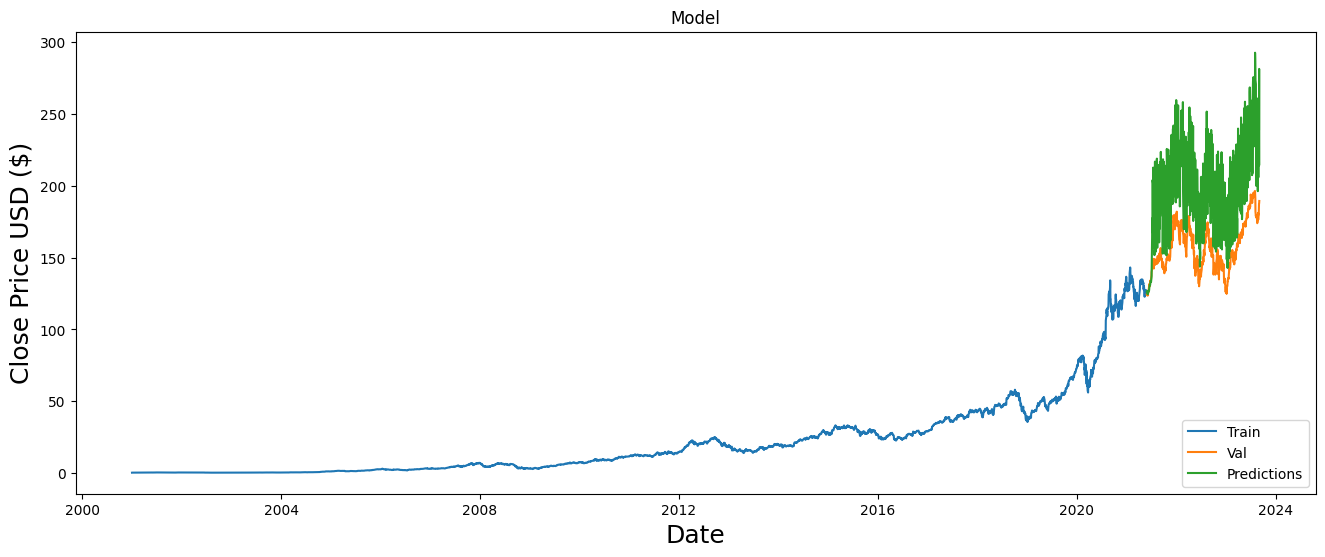

mse : 2394.6714820200236 rmse : 48.93538067717491 mape : 27.315353107342222 avg $ error: -43.02834032000238


In [ ]:
visualize_results(train1, valid1, predictions1)

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

def train_lstm_model(model, x_train, y_train,x_val, y_val):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=5, epochs=5)
    return model

train2, valid2, predictions2  = train_model_pipeline(build_lstm_model,train_lstm_model,stock = 'AAPL',start_date = '2010-01-01',end_date = '2023-09-03')



[*********************100%%**********************]  1 of 1 completed
Epoch 1/5
608/608 [==============================] - 53s 79ms/step - loss: 7.0960e-04
Epoch 2/5
608/608 [==============================] - 49s 80ms/step - loss: 3.6566e-04
Epoch 3/5
608/608 [==============================] - 49s 80ms/step - loss: 2.3504e-04
Epoch 4/5
608/608 [==============================] - 50s 82ms/step - loss: 1.5170e-04
Epoch 5/5
11/11 [==============================] - 2s 42ms/step


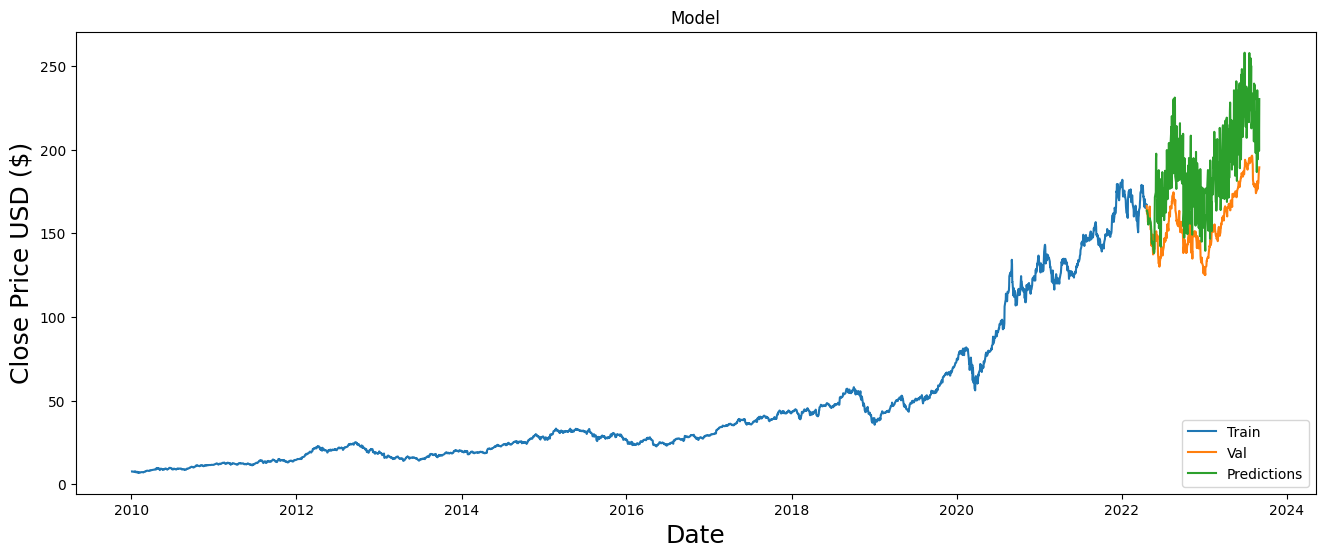

mse : 1244.1785284638534 rmse : 35.2729149414087 mape : 19.53794339720002 avg $ error: -30.553045363005207


In [ ]:
visualize_results(train2, valid2, predictions2)

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    return model

def train_lstm_model(model, x_train, y_train,x_val, y_val):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=5, epochs=5)
    return model

train3, valid3, predictions3  = train_model_pipeline(build_lstm_model,train_lstm_model,stock = 'AAPL',start_date = '2015-01-01',end_date = '2023-09-03')



[*********************100%%**********************]  1 of 1 completed
Epoch 1/5
381/381 [==============================] - 38s 86ms/step - loss: 0.0020
Epoch 2/5
381/381 [==============================] - 32s 84ms/step - loss: 6.6278e-04
Epoch 3/5
381/381 [==============================] - 33s 87ms/step - loss: 4.8420e-04
Epoch 4/5
381/381 [==============================] - 40s 106ms/step - loss: 5.4886e-04
Epoch 5/5
7/7 [==============================] - 1s 41ms/step


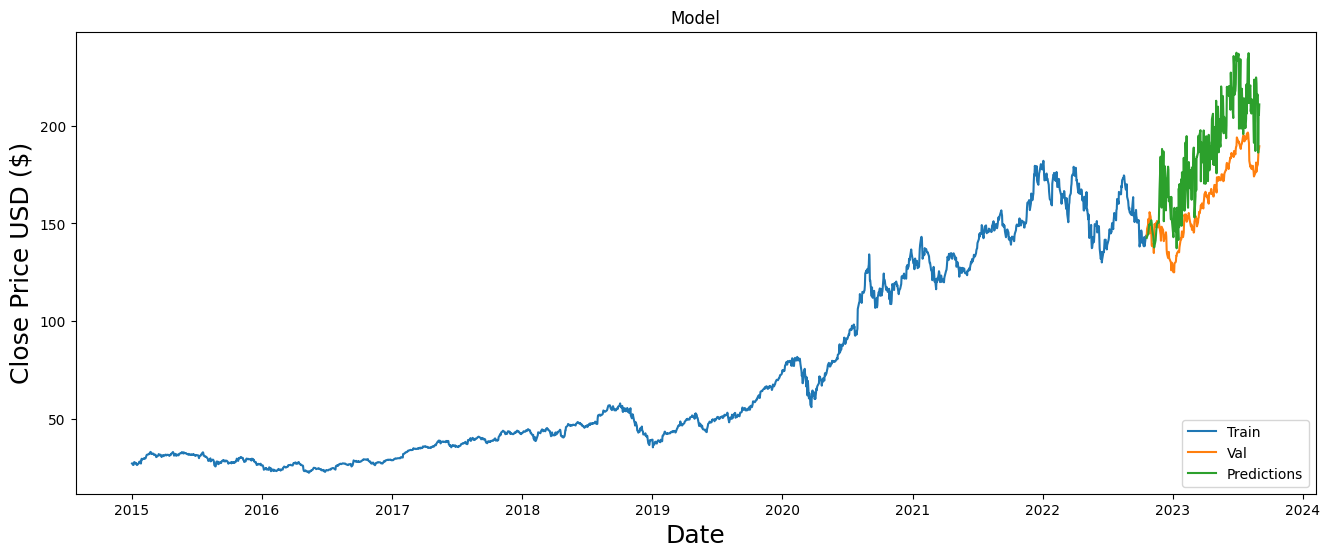

mse : 744.005929175599 rmse : 27.27647208081718 mape : 14.804741307874295 avg $ error: -23.287466138213787


In [ ]:
visualize_results(train3, valid3, predictions3)

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(250, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(125, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(60, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(30, return_sequences=False))
    model.add(Dense(15, activation='linear'))
    model.add(Dense(1))  # Output layer
    return model

def train_lstm_model(model, x_train, y_train,x_val, y_val):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=5, epochs=5)
    return model

train4, valid4, predictions4  = train_model_pipeline(build_lstm_model,train_lstm_model,stock = 'AAPL',start_date = '2015-01-01',end_date = datetime.now())


[*********************100%%**********************]  1 of 1 completed
Epoch 1/5
381/381 [==============================] - 108s 257ms/step - loss: 0.0027
Epoch 2/5
381/381 [==============================] - 95s 249ms/step - loss: 0.0012
Epoch 3/5
381/381 [==============================] - 97s 255ms/step - loss: 7.1103e-04
Epoch 4/5
381/381 [==============================] - 96s 251ms/step - loss: 8.0211e-04
Epoch 5/5
7/7 [==============================] - 3s 163ms/step


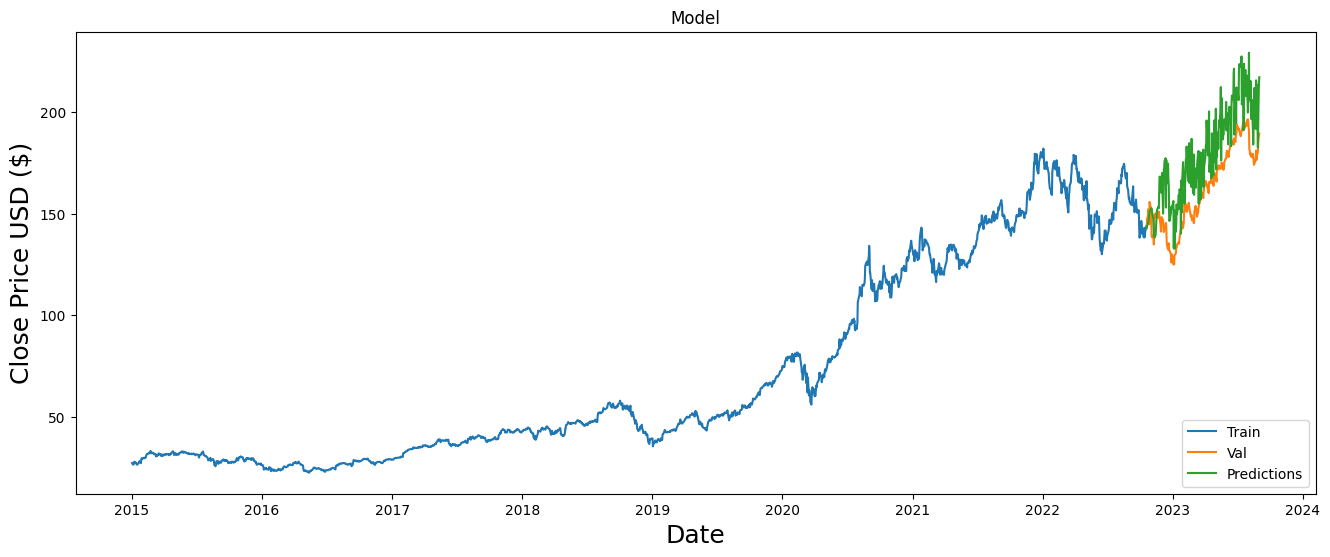

mse : 432.9878697580946 rmse : 20.808360573531367 mape : 11.255188688616064 avg $ error: -17.40478425343264


In [ ]:
visualize_results(train4, valid4, predictions4)

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(250, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(125, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(60, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(30, return_sequences=False))
    model.add(Dense(15, activation='linear'))
    model.add(Dense(1))  # Output layer
    return model

def train_lstm_model(model, x_train, y_train,x_val, y_val):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=5, epochs=5)
    return model

train5, valid5, predictions5  = train_model_pipeline(build_lstm_model,train_lstm_model,stock = 'AAPL',start_date = '2015-01-01',end_date = datetime.now())


[*********************100%%**********************]  1 of 1 completed
Epoch 1/5
381/381 [==============================] - 107s 253ms/step - loss: 0.0032
Epoch 2/5
381/381 [==============================] - 99s 260ms/step - loss: 0.0016
Epoch 3/5
381/381 [==============================] - 98s 256ms/step - loss: 0.0013
Epoch 4/5
381/381 [==============================] - 99s 259ms/step - loss: 0.0011
Epoch 5/5
7/7 [==============================] - 3s 187ms/step


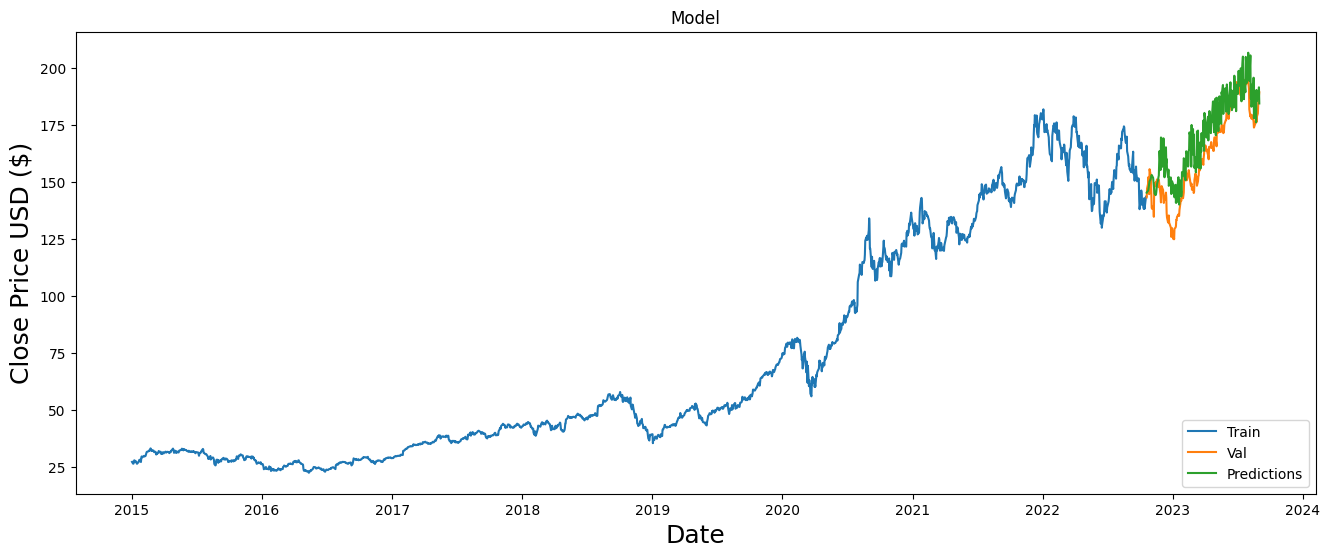

mse : 142.71537835685137 rmse : 11.9463541868158 mape : 6.425547469848225 avg $ error: -8.972907334934304


In [ ]:
visualize_results(train5, valid5, predictions5)

In [ ]:
start_date = '2015-01-01'
end_date = '2023-8-25'
msft_df = fetch_stock_data('MSFT', start_date, end_date)
aapl_df = fetch_stock_data('AAPL', start_date, end_date)

# Combine data into a single DataFrame
combined_data = pd.concat([msft_df['Close'], aapl_df['Close']], axis=1)
combined_data.columns = ['MSFT', 'AAPL']

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(250, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(125, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(60, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(30, return_sequences=False))
    model.add(Dense(15, activation='linear'))
    model.add(Dense(1))  # Output layer
    return model

def train_lstm_model(model, x_train, y_train,x_val, y_val):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=30, epochs=20)
    return model

train6, valid6, predictions6  = train_model_pipeline(build_lstm_model,train_lstm_model,stock = 'AAPL',start_date = '2015-01-01',end_date = datetime.now())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Epoch 1/20
64/64 [==============================] - 45s 551ms/step - loss: 0.0059
Epoch 2/20
64/64 [==============================] - 25s 397ms/step - loss: 0.0012
Epoch 3/20
64/64 [==============================] - 26s 413ms/step - loss: 0.0011
Epoch 4/20
64/64 [==============================] - 25s 399ms/step - loss: 0.0010
Epoch 5/20
64/64 [==============================] - 26s 401ms/step - loss: 9.6146e-04
Epoch 6/20
64/64 [==============================] - 26s 405ms/step - loss: 0.0011
Epoch 7/20
64/64 [==============================] - 27s 426ms/step - loss: 7.7509e-04
Epoch 8/20
64/64 [==============================] - 26s 402ms/step - loss: 8.0474e-04
Epoch 9/20
64/64 [==============================] - 25s 

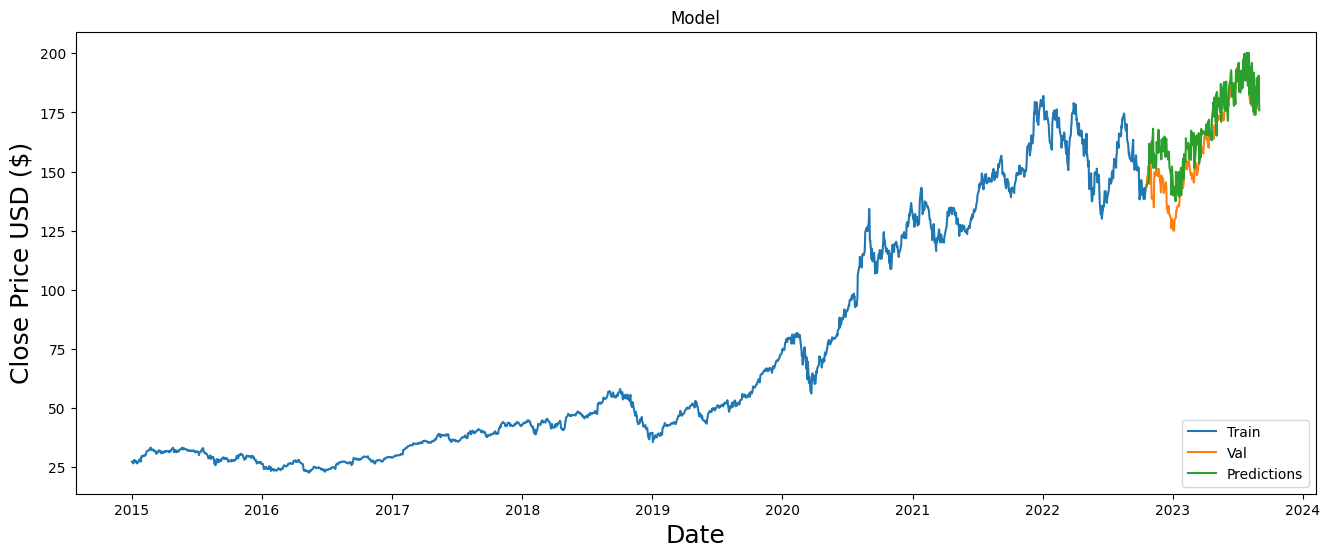

mse : 112.20909225436397 rmse : 10.592879318408379 mape : [5.541358] avg $ error: [-6.847802]


In [ ]:
visualize_results(train6, valid6, predictions6)

In [ ]:

def train_model_pipeline(model_experiment,model_training_experiment,stock = 'AAPL',start_date = '2012-01-01',end_date = datetime.now()):

    df = fetch_stock_data(stock, start_date, end_date)

    # Plot close price history
    # plot_close_price_history(df)

    data = df.filter(['Close'])
    dataset = data.values
    scaler, scaled_data = scale_data(dataset)

    x_train, y_train = create_training_data(scaled_data)
    training_data_len = int(np.ceil(len(dataset) * 0.90))
    x_test, y_test = prepare_test_data(scaled_data,dataset, training_data_len)

    input_shape = (x_train.shape[1], 1)
    model = model_experiment(input_shape)
    model = model_training_experiment(model, x_train, y_train,x_test, y_test)

    predictions = predict_stock_prices(model, x_test, scaler)
    train = data[:training_data_len]

    return train, predictions, predictions


def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(1024, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(512, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(256, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(16, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(8, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(4, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(2, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    return model

def train_lstm_model(model, x_train, y_train,x_val, y_val):
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=25, epochs=20)
    return model

train7, valid7, predictions7  = train_model_pipeline(build_lstm_model,train_lstm_model,stock = 'AAPL',start_date = '2015-01-01',end_date = datetime.now())


[*********************100%%**********************]  1 of 1 completed
Epoch 1/20
77/77 [==============================] - 60s 264ms/step - loss: 0.0991
Epoch 2/20
77/77 [==============================] - 20s 254ms/step - loss: 0.0873
Epoch 3/20
77/77 [==============================] - 20s 264ms/step - loss: 0.0845
Epoch 4/20
77/77 [==============================] - 20s 256ms/step - loss: 0.0827
Epoch 5/20
77/77 [==============================] - 20s 254ms/step - loss: 0.0813
Epoch 6/20
77/77 [==============================] - 20s 262ms/step - loss: 0.0803
Epoch 7/20
77/77 [==============================] - 19s 248ms/step - loss: 0.0797
Epoch 8/20
77/77 [==============================] - 20s 263ms/step - loss: 0.0792
Epoch 9/20
77/77 [==============================] - 19s 249ms/step - loss: 0.0788
Epoch 10/20
77/77 [==============================] - 20s 264ms/step - loss: 0.0786
Epoch 11/20
77/77 [==============================] - 19s 249ms/step - loss: 0.0785
Epoch 12/20
77/77 [========

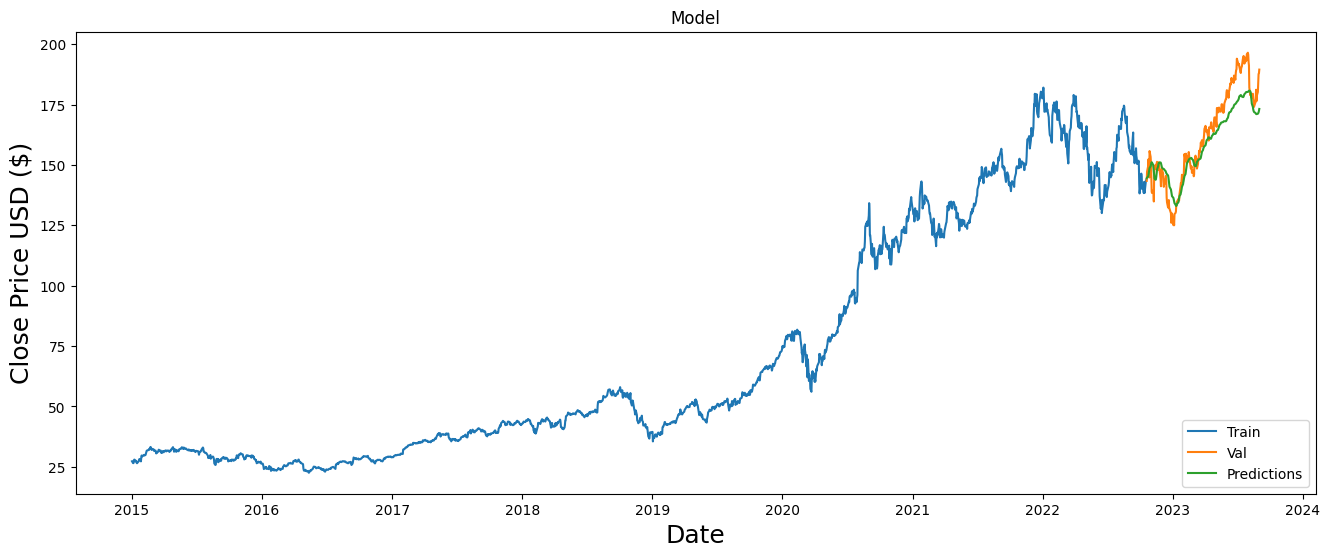

mse : 61.67436037144016 rmse : 7.853302513684301 mape : 3.8691896443565694 avg $ error: 3.4468560525036733


In [ ]:
visualize_results(train7, valid7, predictions7)